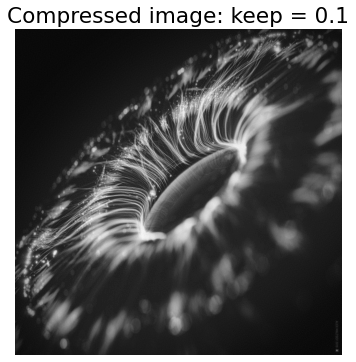

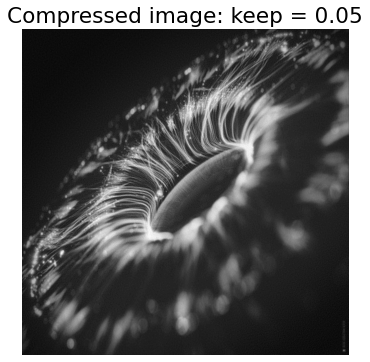

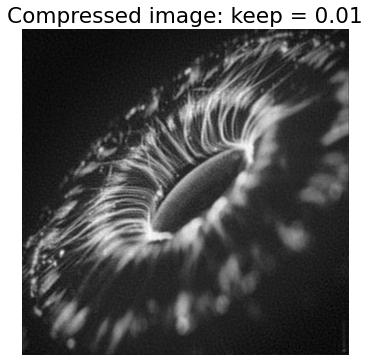

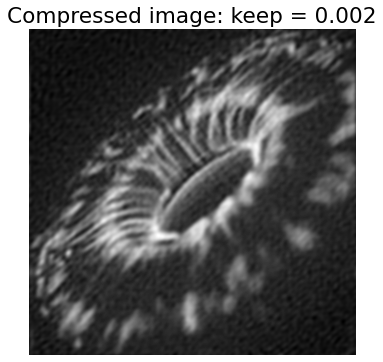

In [3]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]
plt.rcParams.update({'font.size': 18})

A = imread('iris.jpg')
B = np.mean(A, -1); # Convert RGB to grayscale

Bt = np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(-1))) # sort by magnitude

# Zero out all small coefficients and inverse transform
for keep in (0.1, 0.05, 0.01, 0.002):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt)>thresh          # Find small indices
    Atlow = Bt * ind                 # Threshold small indices
    Alow = np.fft.ifft2(Atlow).real  # Compressed image
    plt.figure()
    plt.imshow(Alow,cmap='gray')
    plt.axis('off')
    plt.title('Compressed image: keep = ' + str(keep))